#Importing Necessary Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Loading Data

In [2]:
data= pd.read_csv('/content/drive/MyDrive/aug_train.csv')

#Visualisation

1. Count of Target Variables

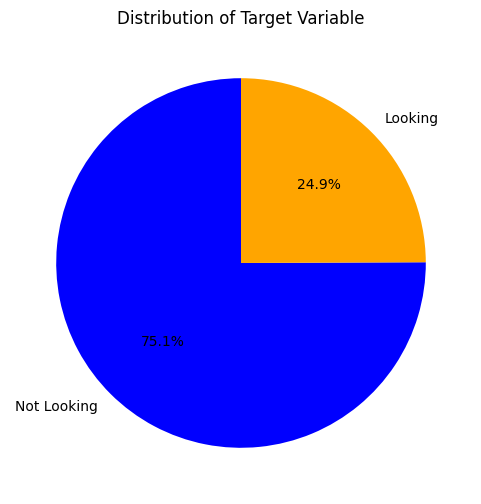

In [3]:
plt.figure(figsize=(6, 6))
target_counts = data['target'].value_counts()
labels_dict = {0: 'Not Looking', 1: 'Looking'}
data['target'].value_counts().plot.pie(labels=target_counts.index.map(labels_dict),autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Distribution of Target Variable')
plt.ylabel('')
plt.show()

2. Distribution of Company Type

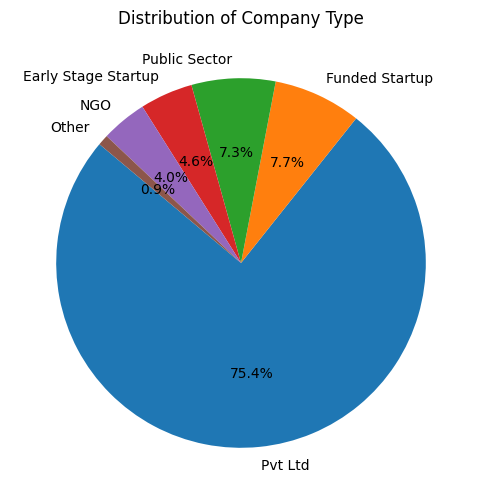

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
data['company_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Company Type')
plt.ylabel('')
plt.show()

3. Distribution of Continues Variables

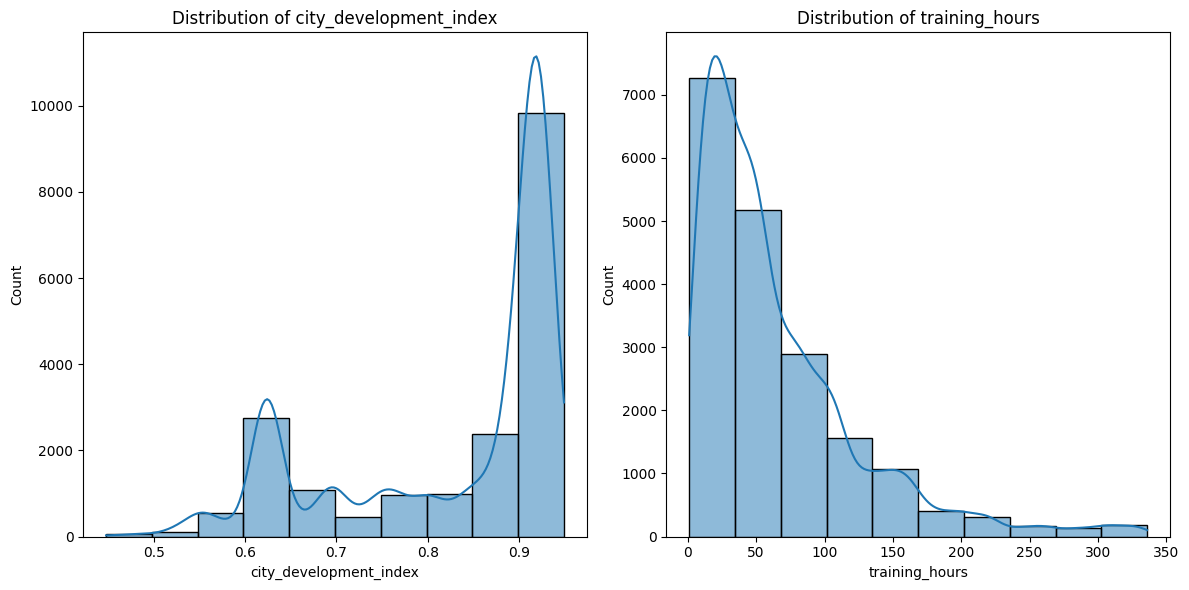

In [5]:
continuous_cols = ['city_development_index', 'training_hours']
plt.figure(figsize=(12, 6))
for i, col in enumerate(continuous_cols):
    plt.subplot(1, 2, i + 1)
    sns.histplot(data[col], bins=10, kde=True, shrink=1)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

4. Distribution of Categorical Variables

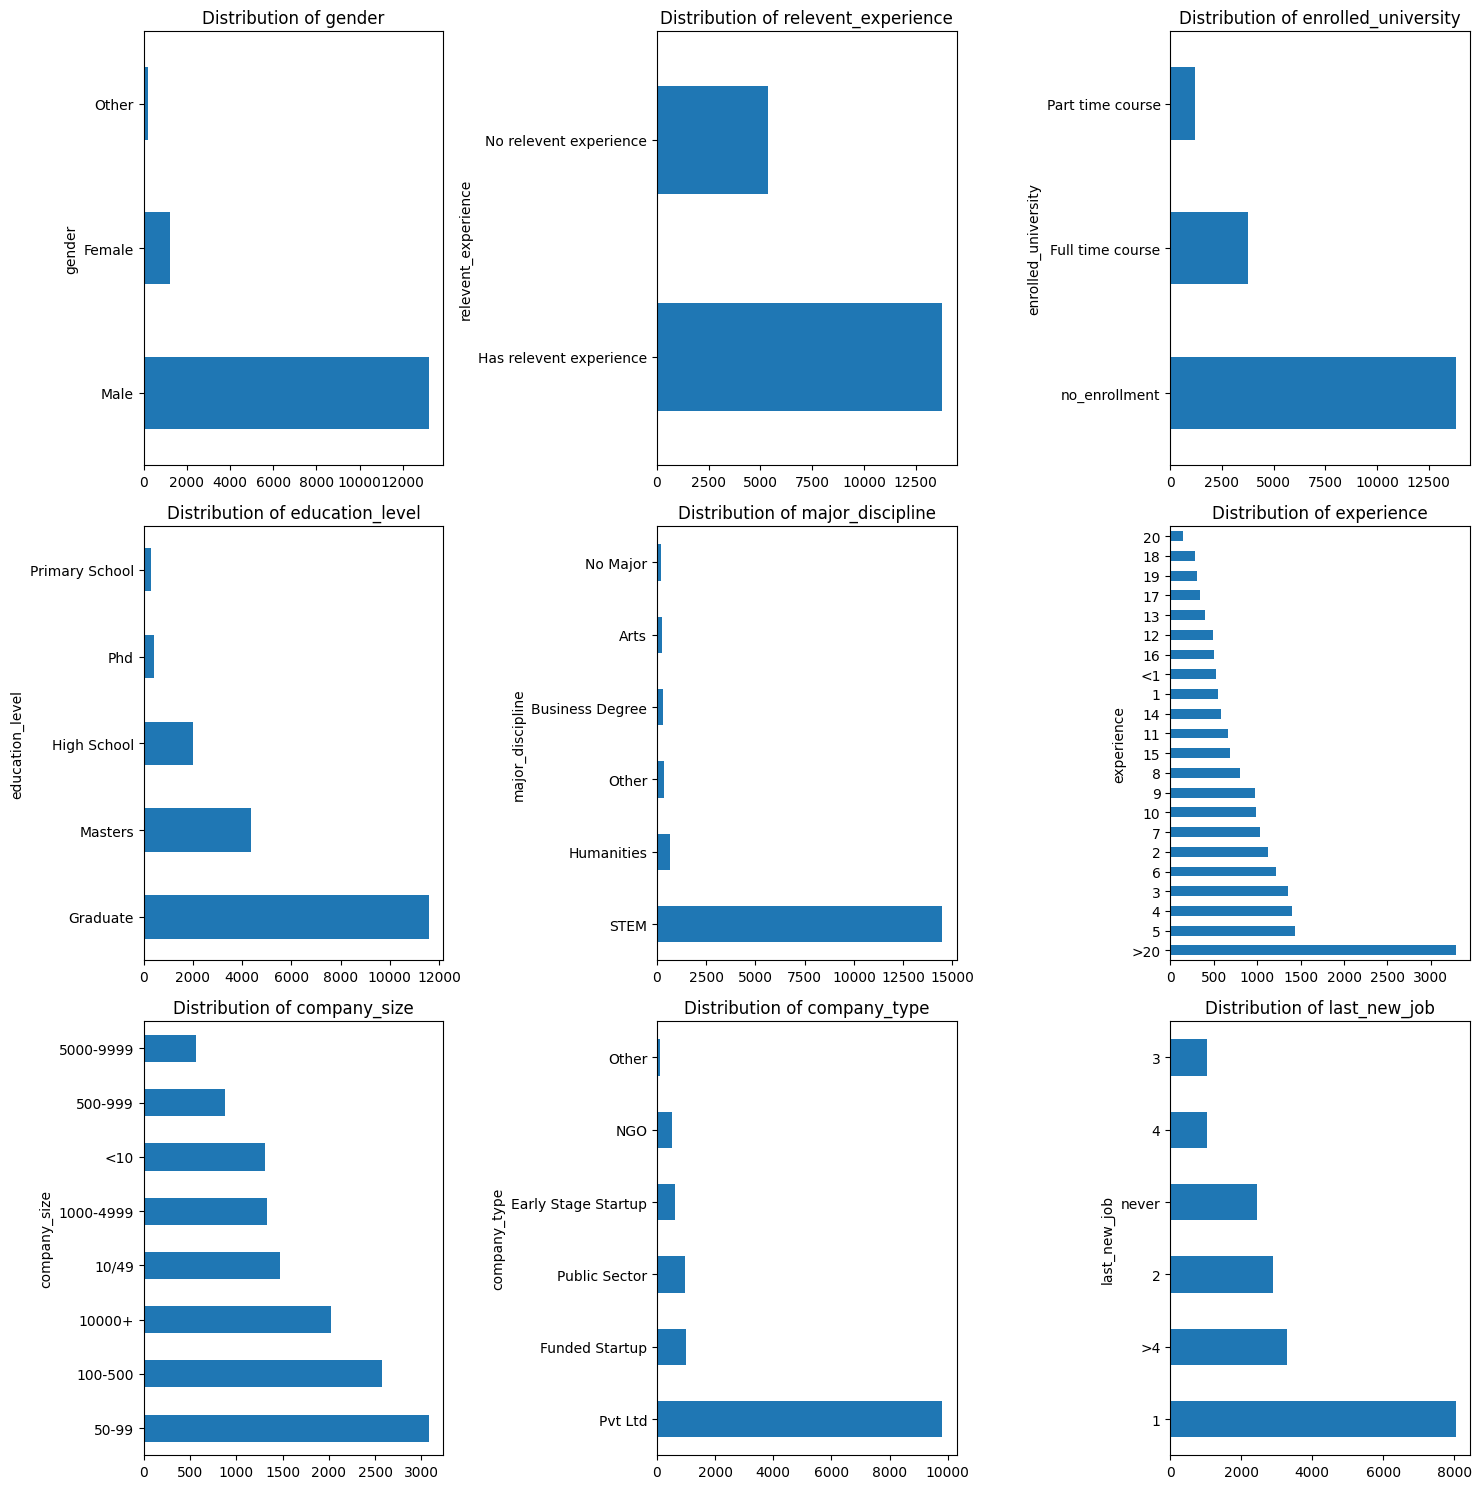

In [6]:
categorical_cols = ['gender', 'relevent_experience', 'enrolled_university','education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    data[col].value_counts().plot(kind='barh')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

5. Continues features vs Target Features

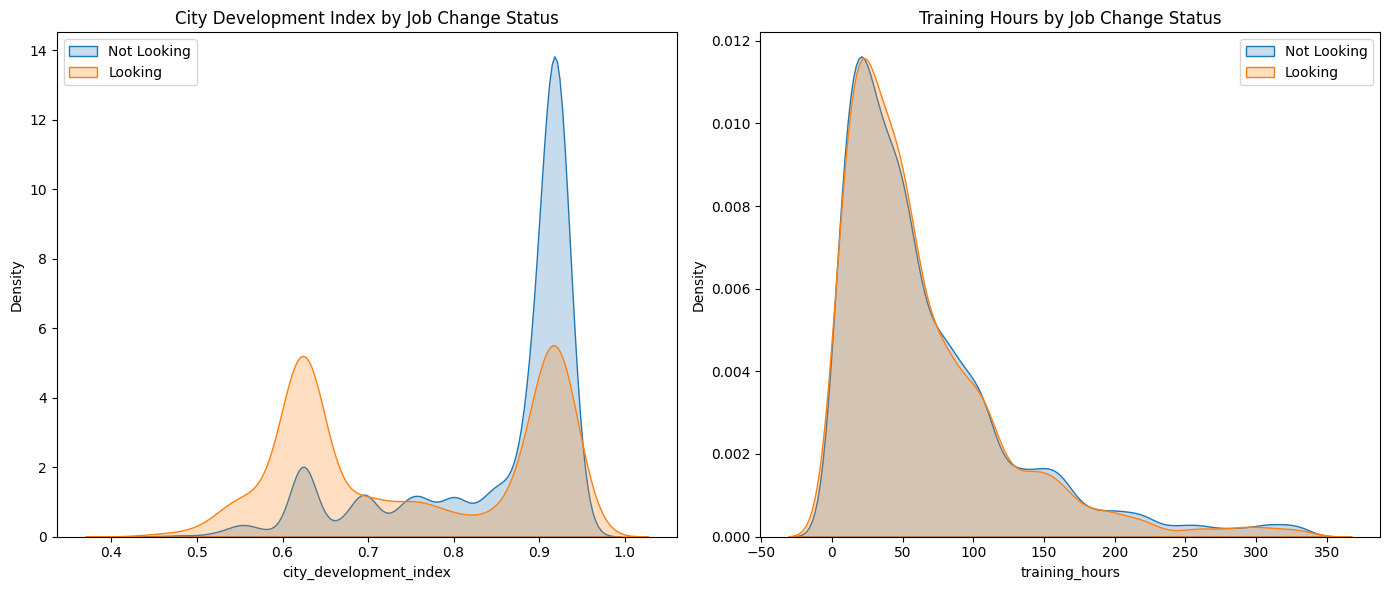

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KDE plot for city_development_index
sns.kdeplot(data=data[data['target'] == 0]['city_development_index'], ax=axes[0], label='Not Looking', shade=True)
sns.kdeplot(data=data[data['target'] == 1]['city_development_index'], ax=axes[0], label='Looking', shade=True)
axes[0].set_title("City Development Index by Job Change Status")
axes[0].legend()

# KDE plot for training_hours
sns.kdeplot(data=data[data['target'] == 0]['training_hours'], ax=axes[1], label='Not Looking', shade=True)
sns.kdeplot(data=data[data['target'] == 1]['training_hours'], ax=axes[1], label='Looking', shade=True)
axes[1].set_title("Training Hours by Job Change Status")
axes[1].legend()
plt.tight_layout()
plt.show()

6. Categorical Features vs Target Variable

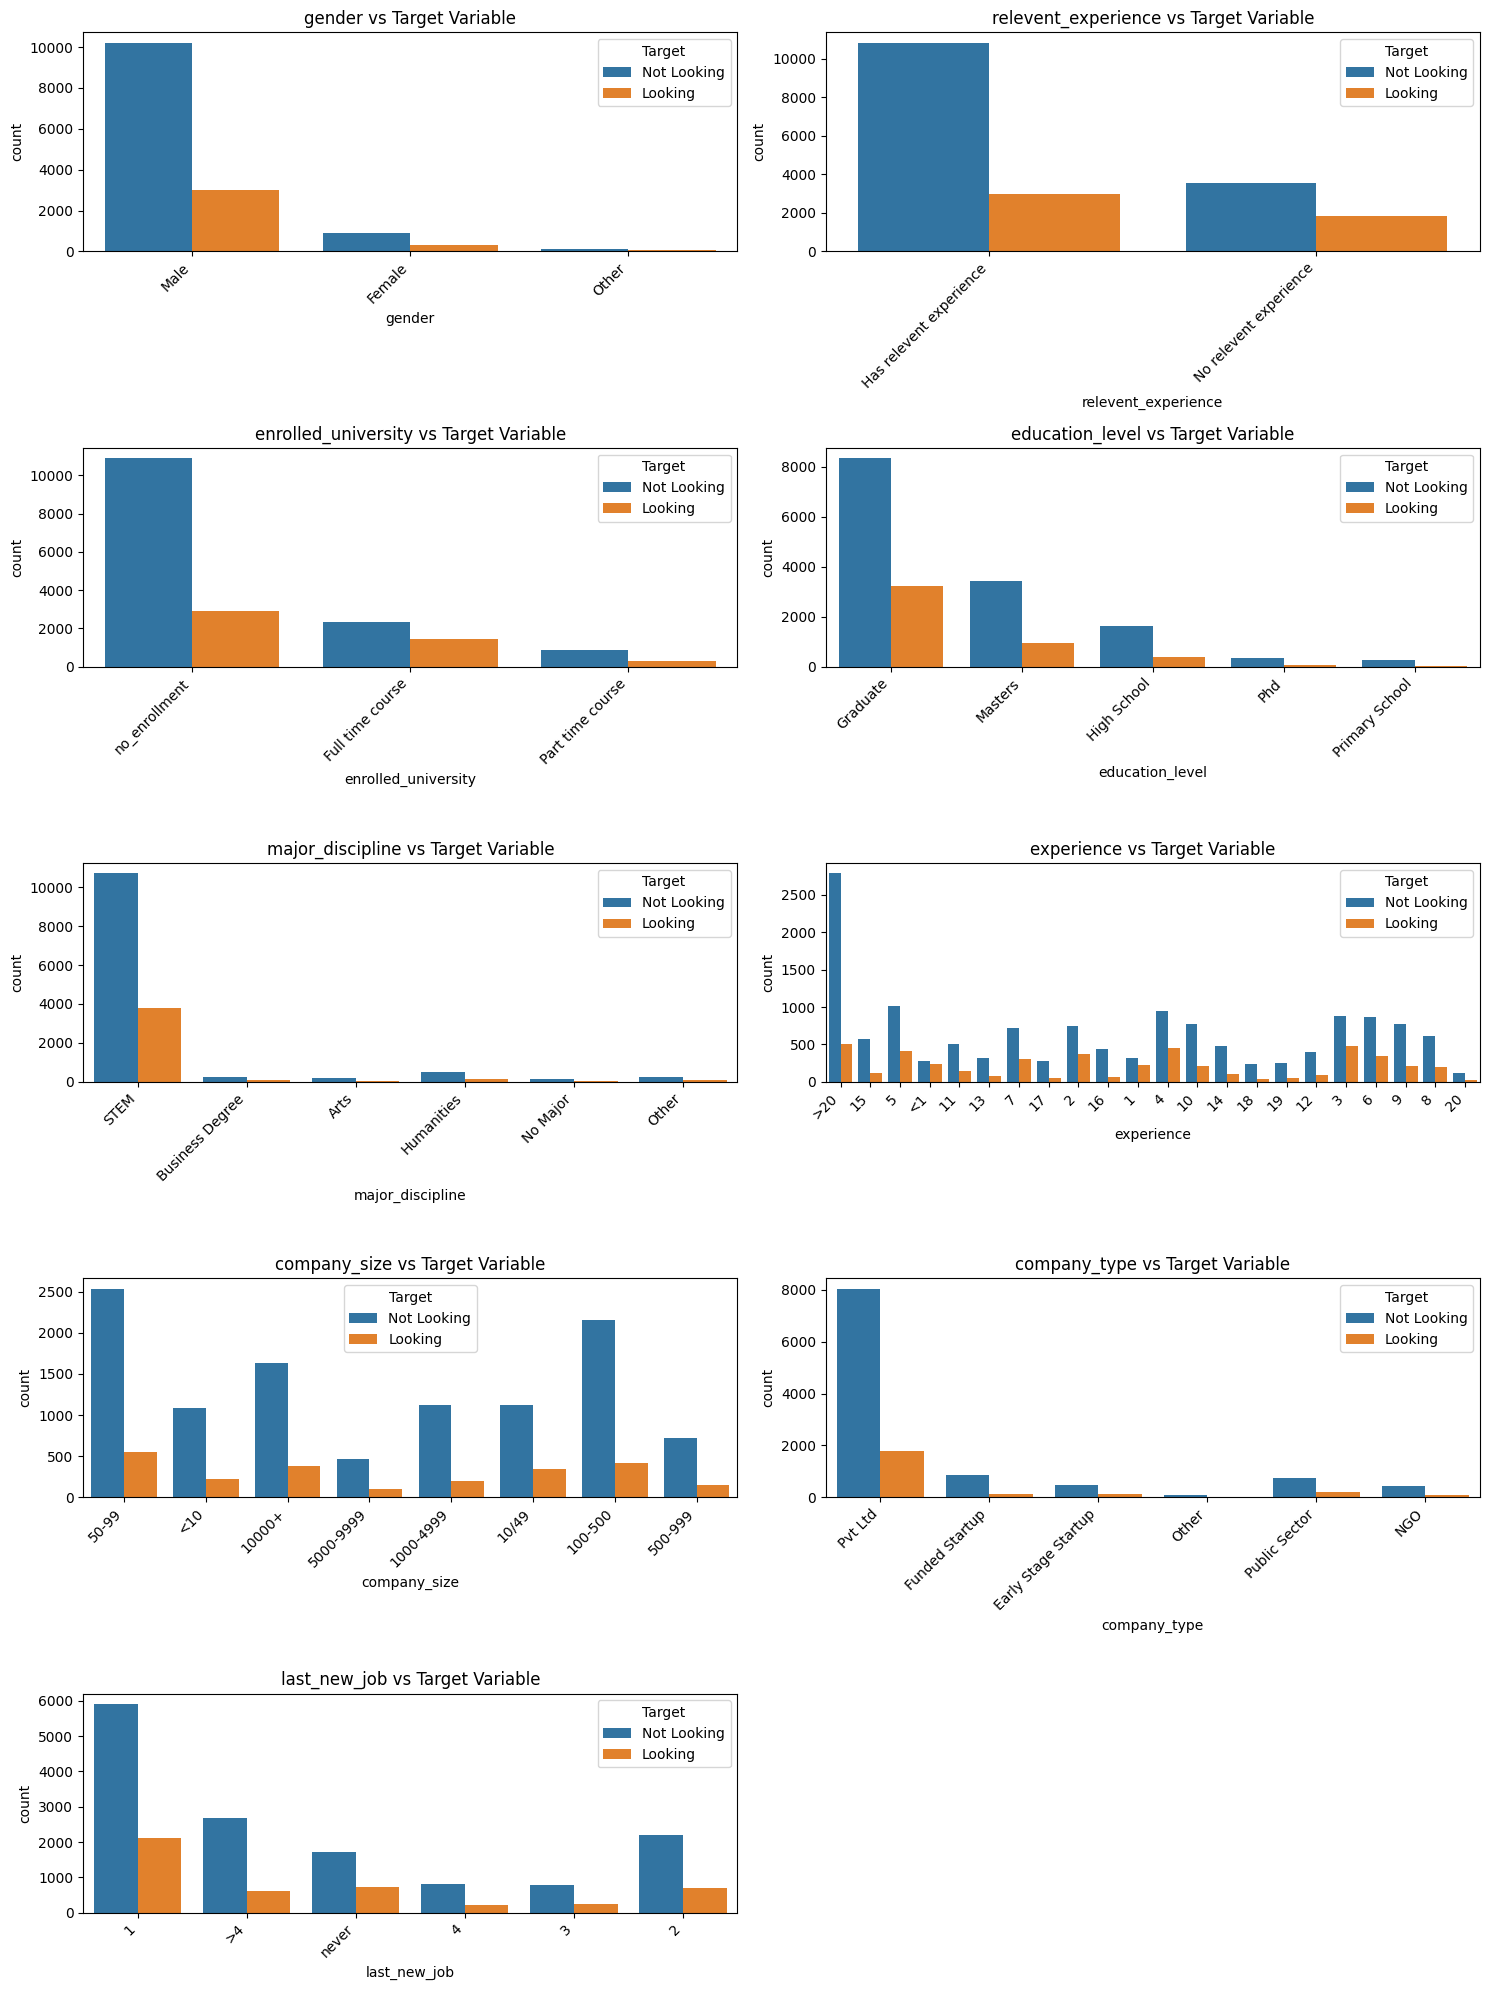

In [8]:
categorical_cols = ['gender', 'relevent_experience', 'enrolled_university','education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i + 1)
    sns.countplot(data=data, x=col, hue='target')
    plt.title(f'{col} vs Target Variable')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Target', labels=['Not Looking', 'Looking'])
plt.tight_layout()
plt.show()

#Loading Data

In [9]:
train_data= pd.read_csv('/content/drive/MyDrive/aug_train.csv')

#Dropping Null Values

In [10]:
train_data['gender'].fillna(method='ffill', inplace=True)
train_data['enrolled_university'].fillna(method='bfill', inplace=True)
train_data['education_level'].fillna(method='ffill', inplace=True)
train_data['major_discipline'].fillna(method='bfill', inplace=True)
train_data['experience'].fillna(method='ffill', inplace=True)
train_data['company_size'].fillna(method='bfill', inplace=True)
train_data['company_type'].fillna(method='ffill', inplace=True)
train_data['last_new_job'].fillna(method='bfill', inplace=True)

In [11]:
train_data.dropna(inplace= True)

#Describe

In [12]:
train_data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19155.000000,19155.000000,19155.000000,19155.000000
mean,16875.989193,0.828843,65.363560,0.249334
std,9616.408020,0.123369,60.060704,0.432639
min,1.000000,0.448000,1.000000,0.000000
25%,8554.500000,0.740000,23.000000,0.000000
50%,16983.000000,0.903000,47.000000,0.000000
75%,25171.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


#Dropping Columns

In [13]:
train_data.drop(['enrollee_id'], axis=1, inplace=True)
train_data.drop(['city'], axis=1, inplace=True)

#Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['gender'] = label_encoder.fit_transform(train_data['gender'])
train_data['relevent_experience']= label_encoder.fit_transform(train_data['relevent_experience'])
train_data['enrolled_university']= label_encoder.fit_transform(train_data['enrolled_university'])
train_data['education_level']= label_encoder.fit_transform(train_data['education_level'])
train_data['major_discipline']= label_encoder.fit_transform(train_data['major_discipline'])
train_data['experience']= label_encoder.fit_transform(train_data['experience'])
train_data['company_size']= label_encoder.fit_transform(train_data['company_size'])
train_data['company_type']= label_encoder.fit_transform(train_data['company_type'])
train_data['last_new_job']= label_encoder.fit_transform(train_data['last_new_job'])

#Correlation Matrix

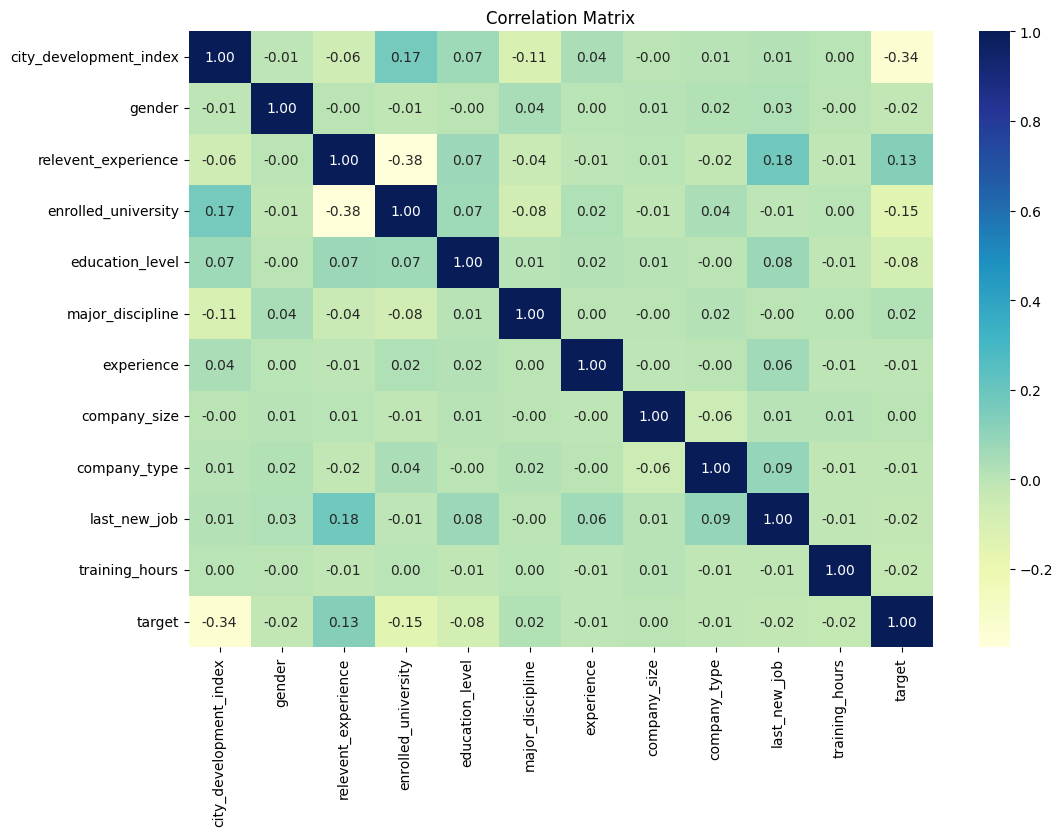

In [15]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [16]:
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print(correlation_with_target)

target                    1.000000
relevent_experience       0.128540
major_discipline          0.019928
company_size              0.000322
experience               -0.007955
company_type             -0.012414
gender                   -0.017311
last_new_job             -0.018158
training_hours           -0.021489
education_level          -0.084458
enrolled_university      -0.151776
city_development_index   -0.341771
Name: target, dtype: float64


#Handling Imbalance data by Oversampling

In [17]:
selected_features = ['gender', 'relevent_experience', 'enrolled_university',
                     'education_level', 'major_discipline', 'experience',
                     'company_size', 'company_type', 'last_new_job',
                     'city_development_index', 'training_hours']
x = train_data[selected_features]
y = train_data['target']

In [18]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x,y=smote.fit_resample(x,y)

In [19]:
y.value_counts()

,count
target,
0.0,14379
1.0,14379


#Predictive Modelling

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

#Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_lr= LogisticRegression()
model_lr.fit(x_train, y_train)
y_pred_lr= model_lr.predict(x_test)
accuracy_lr= accuracy_score(y_test, y_pred_lr)
print(accuracy_lr)

0.7063630041724618


In [22]:
confusion_matrix_lr= confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix_lr)

[[2095  785]
 [ 904 1968]]


In [23]:
classification_report_lr= classification_report(y_test, y_pred_lr)
print(classification_report_lr)

              precision    recall  f1-score   support

         0.0       0.70      0.73      0.71      2880
         1.0       0.71      0.69      0.70      2872

    accuracy                           0.71      5752
   macro avg       0.71      0.71      0.71      5752
weighted avg       0.71      0.71      0.71      5752



#Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_rf= RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred_rf= model_rf.predict(x_test)
accuracy_rf= accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

0.7917246175243393


In [25]:
confusion_matrix_rf= confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

[[2237  643]
 [ 555 2317]]


In [26]:
classification_report_rf= classification_report(y_test, y_pred_rf)
print(classification_report_rf)

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      2880
         1.0       0.78      0.81      0.79      2872

    accuracy                           0.79      5752
   macro avg       0.79      0.79      0.79      5752
weighted avg       0.79      0.79      0.79      5752



#XGBoost

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_xgb= XGBClassifier()
model_xgb.fit(x_train, y_train)
y_pred_xgb= model_xgb.predict(x_test)
accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
print(accuracy_xgb)

0.7858136300417247


In [28]:
confusion_matrix_xgb= confusion_matrix(y_test, y_pred_xgb)
print(confusion_matrix_xgb)

[[2261  619]
 [ 613 2259]]


In [29]:
classification_report_xgb= classification_report(y_test, y_pred_xgb)
print(classification_report_xgb)

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      2880
         1.0       0.78      0.79      0.79      2872

    accuracy                           0.79      5752
   macro avg       0.79      0.79      0.79      5752
weighted avg       0.79      0.79      0.79      5752



#Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_dt= DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred_dt= model_dt.predict(x_test)

In [31]:
accuracy_dt= accuracy_score(y_test, y_pred_dt)
print(accuracy_dt)

0.741307371349096


In [32]:
confusion_matrix_dt= confusion_matrix(y_test, y_pred_dt)
print(confusion_matrix_dt)

[[2101  779]
 [ 709 2163]]


In [33]:
classification_report_dt= classification_report(y_test, y_pred_dt)
print(classification_report_dt)

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      2880
         1.0       0.74      0.75      0.74      2872

    accuracy                           0.74      5752
   macro avg       0.74      0.74      0.74      5752
weighted avg       0.74      0.74      0.74      5752



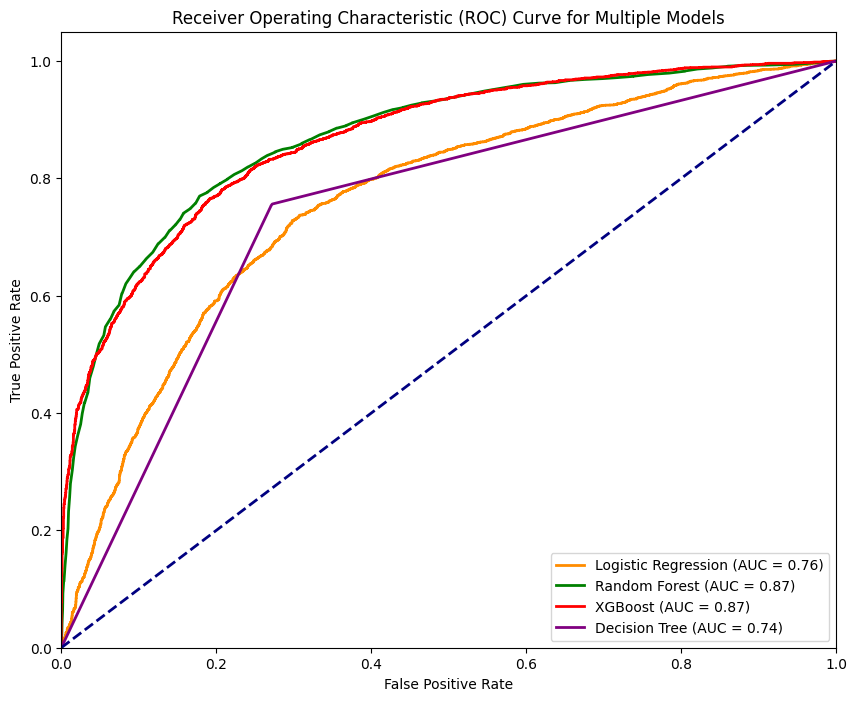

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_prob_lr = model_lr.predict_proba(x_test)[:, 1]
y_prob_rf = model_rf.predict_proba(x_test)[:, 1]
y_prob_xgb = model_xgb.predict_proba(x_test)[:, 1]
y_prob_dt = model_dt.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='purple', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiple Models')
plt.legend(loc="lower right")
plt.show()

#Comparison of Results

In [35]:
from sklearn.model_selection import cross_val_score

1. Logistic Regression CV

In [36]:
cv_scores_lr = cross_val_score(model_lr, x_scaled, y, cv=5)
print(f"Cross-validation scores for Logistic Regression: {cv_scores_lr}")
print(f"Mean CV accuracy for Logistic Regression: {cv_scores_lr.mean()}")

Cross-validation scores for Logistic Regression: [0.652121   0.6924548  0.73522253 0.72109198 0.7330899 ]
Mean CV accuracy for Logistic Regression: 0.7067960424854454


2. Random Forest CV

In [37]:
cv_scores_rf = cross_val_score(model_rf, x_scaled, y, cv=5)
print(f"Cross-validation scores for Random Forest Classifier: {cv_scores_rf}")
print(f"Mean CV accuracy for Random Forest Classifier: {cv_scores_rf.mean()}")

Cross-validation scores for Random Forest Classifier: [0.67611266 0.74408901 0.84770515 0.83446357 0.84002782]
Mean CV accuracy for Random Forest Classifier: 0.7884796415644229


3. XGBoost CV

In [38]:
cv_scores_xgb = cross_val_score(model_xgb, x_scaled, y, cv=5)
print(f"Cross-validation scores for XGBoost Classifier: {cv_scores_xgb}")
print(f"Mean CV accuracy for XGBoost Classifier: {cv_scores_xgb.mean()}")

Cross-validation scores for XGBoost Classifier: [0.65351182 0.72792072 0.84214186 0.83933229 0.84280995]
Mean CV accuracy for XGBoost Classifier: 0.7811433290068196


4. Decision Tree CV

In [39]:
cv_scores_dt = cross_val_score(model_dt, x_scaled, y, cv=5)
print(f"Cross-validation scores for Decision Tree Classifier: {cv_scores_dt}")
print(f"Mean CV accuracy for Decision Tree Classifier: {cv_scores_dt.mean()}")

Cross-validation scores for Decision Tree Classifier: [0.62239221 0.68689152 0.81067455 0.8017736  0.81516258]
Mean CV accuracy for Decision Tree Classifier: 0.7473788920787555


In [40]:
result= pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree'],
                      'Accuracy': [accuracy_lr, accuracy_rf, accuracy_xgb, accuracy_dt],
                      'CV Accuracy': [cv_scores_lr.mean(), cv_scores_rf.mean(), cv_scores_xgb.mean(), cv_scores_dt.mean()]})
result

,Model,Accuracy,CV Accuracy
0,Logistic Regression,0.706363,0.706796
1,Random Forest,0.791725,0.788480
2,XGBoost,0.785814,0.781143
3,Decision Tree,0.741307,0.747379


#Handling Testing Dataset

1. Load Data

In [41]:
test_data= pd.read_csv('/content/drive/MyDrive/aug_test.csv')

2. Removing Null Values

In [42]:
test_data['gender'].fillna('Male', inplace=True)
test_data['enrolled_university'].fillna('no_enrollment', inplace=True)
test_data['education_level'].fillna('Graduate', inplace=True)
test_data['major_discipline'].fillna('STEM', inplace=True)
test_data['experience'].fillna('>20', inplace=True)
test_data['company_size'].fillna('50-99', inplace=True)
test_data['company_type'].fillna('Pvt Ltd', inplace=True)
test_data['last_new_job'].fillna('1', inplace=True)

In [43]:
test_data.dropna(inplace= True)

3. Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test_data['gender'] = label_encoder.fit_transform(test_data['gender'])
test_data['relevent_experience']= label_encoder.fit_transform(test_data['relevent_experience'])
test_data['enrolled_university']= label_encoder.fit_transform(test_data['enrolled_university'])
test_data['education_level']= label_encoder.fit_transform(test_data['education_level'])
test_data['major_discipline']= label_encoder.fit_transform(test_data['major_discipline'])
test_data['experience']= label_encoder.fit_transform(test_data['experience'])
test_data['company_size']= label_encoder.fit_transform(test_data['company_size'])
test_data['company_type']= label_encoder.fit_transform(test_data['company_type'])
test_data['last_new_job']= label_encoder.fit_transform(test_data['last_new_job'])

4. Predict

In [45]:
selected_features = ['gender', 'relevent_experience', 'enrolled_university',
                     'education_level', 'major_discipline', 'experience',
                     'company_size', 'company_type', 'last_new_job',
                     'city_development_index', 'training_hours']

x_test = test_data[selected_features]
predictions = model_rf.predict(x_test)

5. Submission File

In [46]:
submission= pd.DataFrame({'enrollee_id': test_data['enrollee_id'],
                          'target': predictions})
submission.to_csv('submission.csv', index=False)
print("✅ submission.csv file created successfully.")

✅ submission.csv file created successfully.


In [47]:
submission

,enrollee_id,target
0,32403,0.0
1,9858,0.0
2,31806,0.0
3,27385,0.0
4,27724,0.0
...,...,...
2124,1289,0.0
2125,195,0.0
2126,31762,0.0
2127,7873,0.0
